# L-type Ca channel

https://en.wikipedia.org/wiki/Cav1.2

In [1]:
import utils
import matplotlib.pyplot as plt

In [2]:
utils.list_ode_models()

['tentusscher_noble_noble_panfilov_2006_c.ode',
 'tentusscher_2004_mcell_updated.ode',
 'paci_hyttinen_aaltosetala_severi_ventricularVersion.ode']

In [3]:
model_name = "tentusscher_noble_noble_panfilov_2006_c"

In [4]:
model = utils.load_model(model_name, rebuild=True)

Loaded ODE model 'tentusscher_noble_noble_panfilov_2006_c' with:
     Num full states: 17
      Num parameters: 46


In [5]:
t, u = model.solve(t_start=0, t_end=1000.0, dt=0.1)

In [6]:
V_index = model.state_index("V")
print(V_index)

15


In [7]:
V = u[:, V_index]

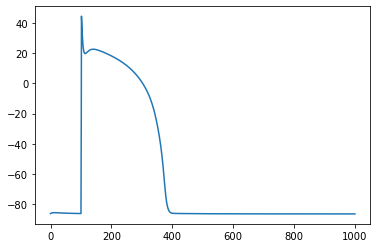

In [8]:
fig, ax = plt.subplots()
ax.plot(t, V)

In [9]:
monitor = model.monitor(u, t)

In [10]:
u.shape

(10001, 17)

In [11]:
monitor.shape

(10001, 86)

In [17]:
# List all monitor names
print(model.monitor_names())

i_CaL_index = model.monitor_index("i_CaL")
i_CaL = monitor[:, i_CaL_index]

['E_Na', 'E_K', 'E_Ks', 'E_Ca', 'alpha_K1', 'beta_K1', 'xK1_inf', 'i_K1', 'i_Kr', 'xr1_inf', 'alpha_xr1', 'beta_xr1', 'tau_xr1', 'xr2_inf', 'alpha_xr2', 'beta_xr2', 'tau_xr2', 'i_Ks', 'xs_inf', 'alpha_xs', 'beta_xs', 'tau_xs', 'i_Na', 'm_inf', 'alpha_m', 'beta_m', 'tau_m', 'h_inf', 'alpha_h', 'beta_h', 'tau_h', 'j_inf', 'alpha_j', 'beta_j', 'tau_j', 'i_b_Na', 'i_CaL', 'd_inf', 'alpha_d', 'beta_d', 'gamma_d', 'tau_d', 'f_inf', 'tau_f', 'alpha_fCa', 'beta_fCa', 'gama_fCa', 'fCa_inf', 'tau_fCa', 'd_fCa', 'i_b_Ca', 'i_to', 's_inf', 'tau_s', 'r_inf', 'tau_r', 'i_NaK', 'i_NaCa', 'i_p_Ca', 'i_p_K', 'i_rel', 'i_up', 'i_leak', 'g_inf', 'd_g', 'Ca_i_bufc', 'Ca_sr_bufsr', 'Istim', 'i_Stim', 'dXr1_dt', 'dXr2_dt', 'dXs_dt', 'dm_dt', 'dh_dt', 'dj_dt', 'dd_dt', 'df_dt', 'dfCa_dt', 'ds_dt', 'dr_dt', 'dg_dt', 'dCa_i_dt', 'dCa_SR_dt', 'dNa_i_dt', 'dV_dt', 'dK_i_dt']


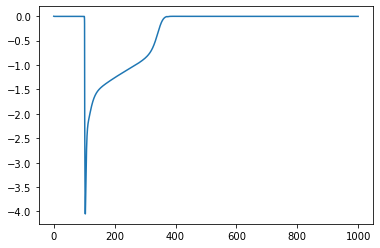

In [23]:
fig, ax = plt.subplots()
ax.plot(t, i_CaL)

In [19]:
parameters = model.default_parameters()
print(parameters.keys())

dict_keys(['P_kna', 'g_K1', 'g_Kr', 'g_Ks', 'g_Na', 'g_bna', 'g_CaL', 'g_bca', 'g_to', 'K_mNa', 'K_mk', 'P_NaK', 'K_NaCa', 'K_sat', 'Km_Ca', 'Km_Nai', 'alpha', 'gamma', 'K_pCa', 'g_pCa', 'g_pK', 'Buf_c', 'Buf_sr', 'Ca_o', 'K_buf_c', 'K_buf_sr', 'K_up', 'V_leak', 'V_sr', 'Vmax_up', 'a_rel', 'b_rel', 'c_rel', 'tau_g', 'Na_o', 'IstimAmplitude', 'IstimEnd', 'IstimPeriod', 'IstimPulseDuration', 'IstimStart', 'Cm', 'F', 'R', 'T', 'V_c', 'K_o'])


In [20]:
parameters["g_CaL"] *= 0.2
t2, u2 = model.solve(t_start=0, t_end=1000.0, dt=0.1, parameters=parameters)

Update paramameter g_CaL from 0.000175 to 3.5000000000000004e-05


In [21]:
V_kr_block = u2[:, V_index]

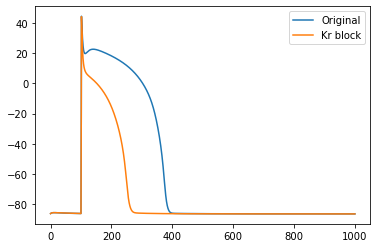

In [22]:
fig, ax = plt.subplots()
ax.plot(t, V, label="Original")
ax.plot(t2, V_kr_block, label="Kr block")
ax.legend(loc="best")

In [25]:
import ipywidgets as widgets

In [26]:
%matplotlib widget
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, V, label="Original")
line_V, = ax[0].plot(t, V, label="CaL block")
ax[0].legend(loc="best")
ax[0].set_title("Voltage")
ax[1].plot(t, i_CaL, label="Original")
line_iCaL, = ax[1].plot(t, i_CaL, label="CaL block")
ax[1].legend(loc="best")
ax[1].set_title("i CaL")

@widgets.interact(block=(-1, 1, 0.1))
def Kr_block(block):
    parameters = model.default_parameters().copy()
    parameters["g_CaL"] *= (1 + block)
    t2, u2 = model.solve(t_start=0, t_end=1000.0, dt=0.1, parameters=parameters)
    monitor = model.monitor(u2, t2)
    i_CaL_block = monitor[:, i_CaL_index]
    V_CaL_block = u2[:, V_index]
    line_V.set_ydata(V_CaL_block)
    line_iCaL.set_ydata(i_CaL_block)
    fig.canvas.draw_idle()
 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='block', max=1.0, min=-1.0), Output()), _dom_classes=…